# AAAI2019 標題的文字雲

In [1]:
import os
import numpy as np
import pandas as pd
from collections import Counter
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image

### 初始化stemmer

In [2]:
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
snowball_stemmer = SnowballStemmer('english')
wordnet_lemmatizer = WordNetLemmatizer()

stop_words = stopwords.words('english')

### 自定義函數

In [3]:
def get_all_titles():
    all_titles = ''
    dataset_path = '../dataset'
    for file in os.listdir(dataset_path):
        file_path = os.path.join(dataset_path, file)
        if os.path.isfile(file_path):
            with open(file_path) as f:  
                line = f.readlines()[0].strip()
                all_titles = line + str('. ') + all_titles
        else:
            print(file_path + ' does not exist.')
    return all_titles[:-2]

### 主程式，開始處理

In [4]:
contents = get_all_titles()

print(len(contents))
#print(contents)

96777


### tokenize (斷詞)

In [5]:
tokens = nltk.word_tokenize(contents)
#tokens = nltk.wordpunct_tokenize(contents)

print(len(tokens))
#print(tokens)

13318


### stemming and lemmatize (處理時態)

In [6]:
#tokens_stemmed = [porter_stemmer.stem(t) for t in tokens]
#tokens_stemmed = [lancaster_stemmer.stem(t) for t in tokens]
#tokens_stemmed = [snowball_stemmer.stem(t) for t in tokens]
#tokens_stemmed = [wordnet_lemmatizer.lemmatize(t) for t in tokens]

tokens_stemmed = []
for t in tokens:
    #tokens_stemmed.append(porter_stemmer.stem(t.lower()))
    tokens_stemmed.append(wordnet_lemmatizer.lemmatize(t.lower()))

print(tokens_stemmed[:10])


['online', 'multi-agent', 'pathfinding', '.', 'sentence-wise', 'smooth', 'regularization', 'for', 'sequence', 'to']


### stop words

In [7]:
#filtered_sentence = [w for w in word_tokens if not w in stop_words] 
tokens_filtered = [] 
for t in tokens_stemmed: 
    if t not in stop_words:
        tokens_filtered.append(t) 

print(tokens_filtered[:10])

['online', 'multi-agent', 'pathfinding', '.', 'sentence-wise', 'smooth', 'regularization', 'sequence', 'sequence', 'learning']


### 產生文字雲(方式一：用plt)

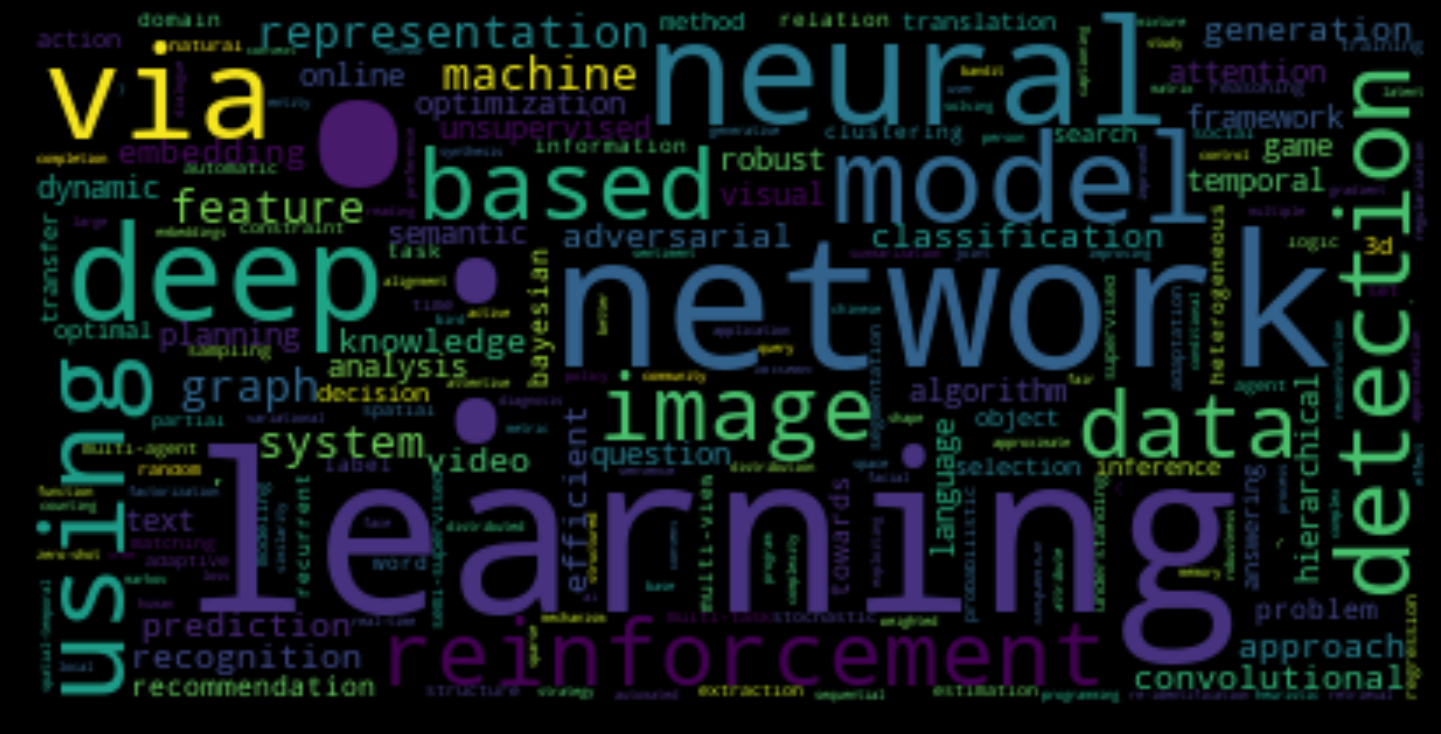

In [8]:
#wc = WordCloud().generate(contents)
wc = WordCloud().generate_from_frequencies(frequencies=Counter(tokens_filtered))

plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### 方式二：用word cloud

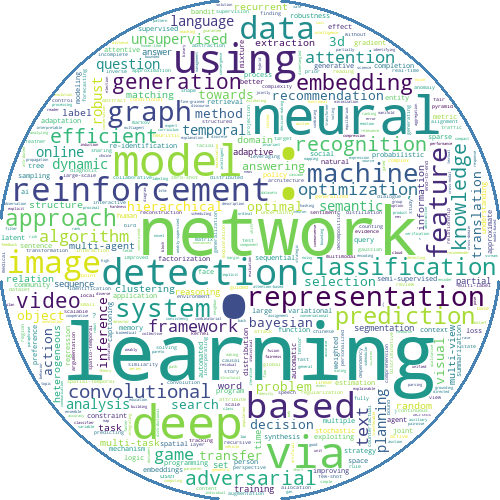

In [9]:
font_path = '../tools/msjh.ttc'
mask = np.array(Image.open("../images/circle.png"))

wc2 = WordCloud(background_color = "white",
                       max_words = 2000,
                       mask = mask,
                       stopwords = stop_words,
                       max_font_size = None,
                       #font_path = font_path,
                       random_state = None,
                       prefer_horizontal = 0.9,
                       contour_width = 3,
                       contour_color = 'steelblue')
#wc2.generate(contents)
wc2.generate_from_frequencies(frequencies=Counter(tokens_filtered))
wc2.to_image()